In [23]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Strong scalability study

In [24]:
df_strong = pd.read_csv("strong/coarsen1/emilia_strong_logs.csv", sep=',', header=0, names=['np','duration','nb_ite','residual'], dtype='float64')


C:\Users\aympa\AppData\Local\Temp/ipykernel_13652/1923123914.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


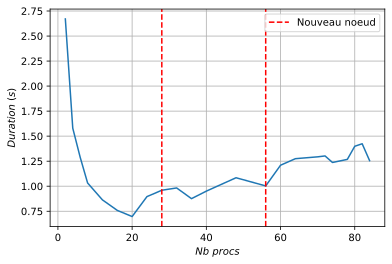

In [25]:

from IPython.display import Image, set_matplotlib_formats 
# set_matplotlib_formats('pdf') # toggle vector graphics for a crisp plot!
set_matplotlib_formats('svg')

fig, ax = plt.subplots()

plt.plot(df_strong['np'], df_strong['duration'])

#dotted red lines to show where new node start
plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Nb\ procs$")
plt.ylabel("$Duration\ (s)$")
plt.legend()
plt.grid()

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



KeyError: 0

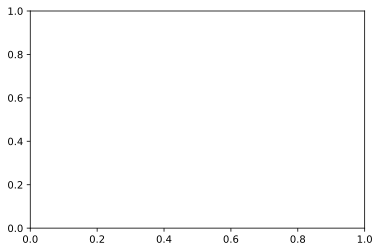

In [26]:
fig, ax = plt.subplots()


base_duration = df_strong.loc[df_strong['np'] == 1] 
base_duration = base_duration['duration'][0]
df_strong['duration'] = base_duration/df_strong['duration']

plt.plot(df_strong['np'], np.log(df_strong['duration']))
#dotted red lines to show where new node start
plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Nb\ procs$")
plt.ylabel("$Acceleration$")
plt.legend()
plt.grid()

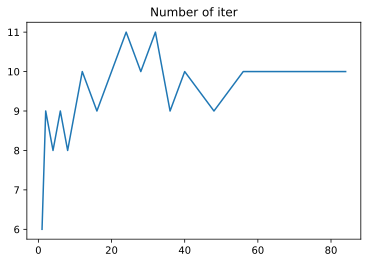

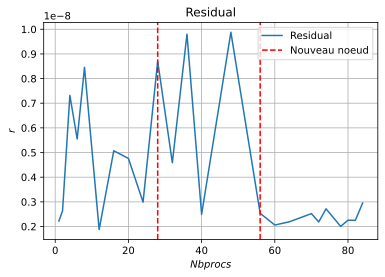

In [ ]:
plt.title("Number of iter")
plt.plot(df_strong['np'], df_strong['nb_ite'], label="Nb iter")
plt.figure()

plt.title("Residual")
plt.plot(df_strong['np'], df_strong['residual'], label="Residual")

#dotted red lines to show where new node start
plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Nb procs$")
plt.ylabel("$r$")
plt.legend()
plt.grid()

# Weak scalability study

In [ ]:
df_weak = pd.read_csv("weak/weak_start33.csv", sep=',', header=0, names=['np', 'nx', 'duration','nb_ite','residual'], dtype='float64')
df_weak

,np,nx,duration,nb_ite,residual
0,1.0,33.0,0.001552,7.0,8.174872e-10
1,2.0,66.0,0.008300,10.0,1.685075e-09
2,4.0,132.0,0.016292,11.0,5.085987e-09
3,8.0,264.0,0.040162,15.0,6.817363e-09
4,16.0,528.0,0.089541,18.0,4.411533e-09
5,28.0,924.0,0.225533,20.0,6.567507e-09
6,32.0,1056.0,0.498910,20.0,2.451388e-08
7,56.0,1848.0,1.659838,20.0,2.642891e-07
8,64.0,2112.0,2.320175,20.0,3.275419e-07
9,84.0,2772.0,3.735671,20.0,1.056397e-06


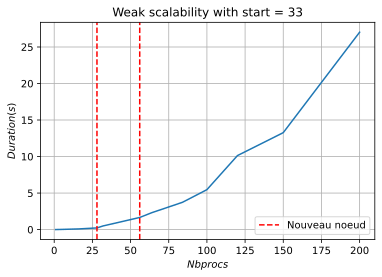

In [ ]:

plt.title("Weak scalability with start = 33")

plt.plot(df_weak['np'], df_weak['duration'])

#dotted red lines to show where new node start
plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Nb procs$")
plt.ylabel("$Duration (s)$")
plt.legend()
plt.grid()

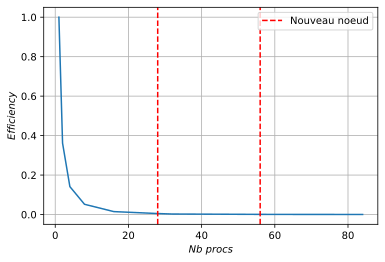

In [28]:
df_weak100 = pd.read_csv("weak/weak_start100.csv", sep=',', header=0, names=['np', 'nx', 'duration','nb_ite','residual'], dtype='float64')
df_weak100

base_duration = df_weak100.loc[df_weak100['np'] == 1] 

base_duration = base_duration['duration'][0]

df_weak100['duration'] = base_duration/df_weak100['duration']
# plt.title("Weak scalability with start = 100")

plt.plot(df_weak100['np'], df_weak100['duration'])

#dotted red lines to show where new node start
plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Nb\ procs$")
plt.ylabel("$Efficiency$")
plt.legend()
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


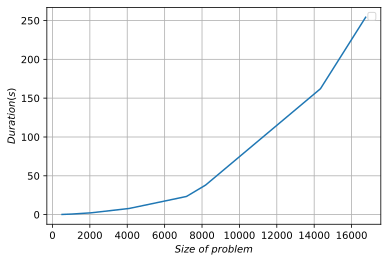

In [ ]:

df_weak256 = pd.read_csv("weak/weak_start256.csv", sep=',', header=1, names=['np', 'nx', 'duration','nb_ite','residual'], dtype='float64')


plt.plot(df_weak256['nx'], df_weak256['duration'])

#dotted red lines to show where new node start
# plt.axvline(x=28, color='r', linestyle='--', label='Nouveau noeud')
# plt.axvline(x=56, color='r', linestyle='--')

plt.xlabel("$Size\ of\ problem$")
plt.ylabel("$Duration (s)$")
plt.legend()
plt.grid()

# Distance nodes

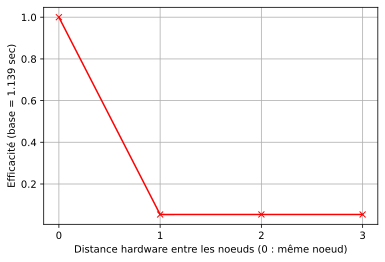

In [36]:
df_dist = pd.read_csv("node_distance/dist_np2_nx1024.csv", sep=',', header=0, names=['dist', 'duration','nb_ite','residual'], dtype='float64')

base_time = df_dist['duration'][0]
df_dist['duration'] = base_time/df_dist['duration']
l = [0,1,2,3]
ax = plt.figure().gca()
plt.plot(l, df_dist['duration'], '-xr')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Distance hardware entre les noeuds (0 : même noeud)")
plt.ylabel("Efficacité (base = {:.3f} sec)".format(base_time))
plt.grid()